In [1]:
%pip install numpy==2.1.1
%pip install matplotlib==3.9.2
%pip install tqdm

  Using cached numpy-2.1.1-cp312-cp312-macosx_14_0_x86_64.whl.metadata (60 kB)
Using cached numpy-2.1.1-cp312-cp312-macosx_14_0_x86_64.whl (6.6 MB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.9.2-cp312-cp312-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-macosx_10_13_universal2.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-macosx_10_9_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_10_10_x86_64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_10_12_x86_64.whl (7.9 MB)
Using cached contourpy-1.3.0-cp312-cp312-maco

# __COMP532__: &nbsp; Assigment 1

## __Problem 1__: Implement a multi-armed bandit algorithm.

We used an incremental method to evaluate and implementation the optimal action and reward for playing multi-bandit arms. <br>

Fix values for our assignments:
1. Number or arms: 20
2. Number of problems: 2000
3. ϵ for ϵ-greedy action: 0, 0.1 and 0.01

Given $Q_n$ and the $n$th reward, $R_n$, the new average of all n rewards can be computed by

<div align="center">
$$ Q_{n+1} = Q_n + \frac{1}{n}[R_n - Q_n] $$
</div>


In [2]:
# Import usage libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [3]:
# Create bandit value

def simple_max(Q, N, t):
  # breaking ties randomly
  return np.random.choice(np.flatnonzero(Q == Q.max()))

def simple_bandit(no_of_arms, epsilon, steps, seed_no):
  # Use np.random for normal distribution of seed dataset around k arms.
  # Q star (True value) is based on "Action-Value" Method
  # Declare true value by number of problem and arms
  q_star = np.random.normal(0 , 1, (seed_no, no_of_arms))

  # Initialise rewards and actions
  rewards = np.zeros(steps)
  actions = np.zeros(steps)

  # Run in according to number of problems
  for i in tqdm(range(seed_no)):
    # Define zero array as a inital action-value (Q)
    q_val = np.zeros(no_of_arms)
    # Define the array of action acount
    no_of_action = np.zeros(no_of_arms)
    # Define the best action from q star
    best_action = np.argmax(q_star[i])

    for t in range(steps):
      if np.random.rand() < epsilon: # explore
        # randomly choose the action
        action = np.random.randint(no_of_arms)
      else: # exploitation
        # choose the best value of action
        action = np.random.choice(np.flatnonzero(q_val == q_val.max()))

      # Assign a reward to the chosen action
      reward = np.random.normal(q_star[i, action], 1)

      #Add the number of actions
      no_of_action[action] += 1

      # Update state value of action by current action and new reward
      q_val[action] = q_val[action] + (reward - q_val[action]) / no_of_action[action]

      # Sum total reward
      rewards[t] += reward

      # If the value is the best value, so choose that value
      if action == best_action:
        actions[t] += 1

  # Calculate average reward
  avg_reward = np.divide(rewards, seed_no)
  # Calculate optimal action
  optimal_action = np.divide(actions, seed_no)
  return avg_reward, optimal_action


In [4]:
# Number of arm
no_of_arms = 20
# Number of problems (The amount of time to play)
seed_no =  2000
# Number of repeated steps
cycle_steps = 1000
# Declare epsilon value to use as we are going to consider with epsilion-gredy q-learning
epsilons = [0, 0.01, 0.1]

# array of average rewards for each epsilon values
avg_rewards = []
# array of optimal action for each epsilon values
opt_action = []

# Implementation with define values
for epsilon in epsilons:
  ep, ac = simple_bandit(no_of_arms=no_of_arms, epsilon=epsilon, steps=cycle_steps, seed_no=seed_no)
  # add value into defined arrays
  avg_rewards.append(ep)
  opt_action.append(ac)

100%|██████████| 2000/2000 [01:42<00:00, 19.47it/s]


In [5]:
# Print out the best value from each epislons
# Average Awards:
for i in range(0, len(avg_rewards)):
  print(f"the best average rewards of Epsilon {epsilons[i]} is {round(max(avg_rewards[i]), 4)}.")

for i in range(0, len(opt_action)):
  print(f"the best optimal action of Epsilon {epsilons[i]} is {round(max(opt_action[i]), 4)}.")

the best average rewards of Epsilon 0 is 1.1053.
the best average rewards of Epsilon 0.01 is 1.4876.
the best average rewards of Epsilon 0.1 is 1.7416.
the best optimal action of Epsilon 0 is 0.1835.
the best optimal action of Epsilon 0.01 is 0.3995.
the best optimal action of Epsilon 0.1 is 0.7325.


Playing bandit for 20 arms with 2000 problems 



Text(0, 0.5, 'Optimal Action')

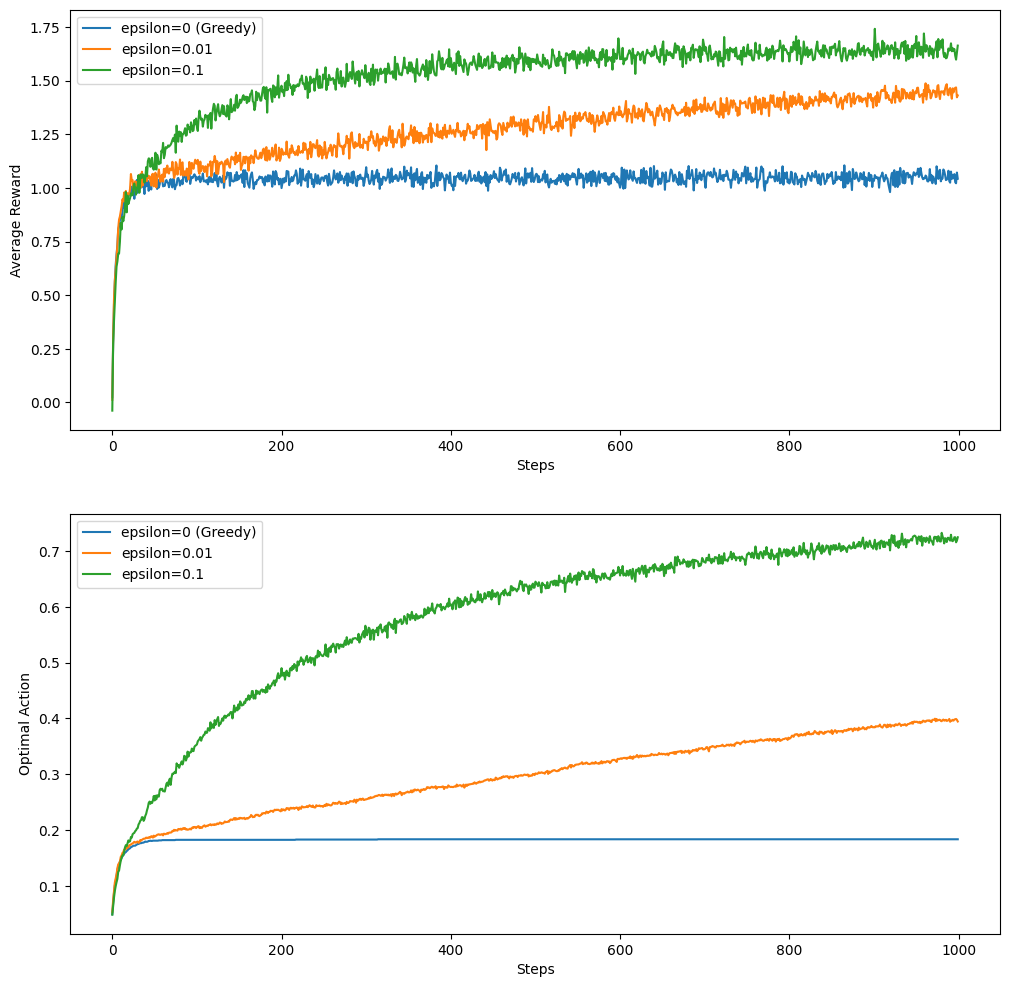

In [6]:
print(f"Playing bandit for {no_of_arms} arms with {seed_no} problems \n")

fig, ax = plt.subplots(2, figsize= (12, 12))

# Plot Average reward along with the cycle steps
ax[0].plot(range(cycle_steps), avg_rewards[0])
ax[0].plot(range(cycle_steps), avg_rewards[1])
ax[0].plot(range(cycle_steps), avg_rewards[2])
ax[0].legend(['epsilon=0 (Greedy)', 'epsilon=0.01', 'epsilon=0.1'])
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Average Reward")

# Plot optimal action along with the cycle steps
ax[1].plot(range(cycle_steps), opt_action[0])
ax[1].plot(range(cycle_steps), opt_action[1])
ax[1].plot(range(cycle_steps), opt_action[2])
ax[1].legend(['epsilon=0 (Greedy)', 'epsilon=0.01', 'epsilon=0.1'])
ax[1].set_xlabel("Steps")
ax[1].set_ylabel("Optimal Action")
